---
# Conversion Ralph >> Jurjen
Double check whether the conversion from Ralph's dataset works fine; see also `/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/sub-012/ses-1/info.md`

In [2]:
from linescanning import (
    prf,
    plotting,
    utils,
    optimal
)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
opj = os.path.join

In [3]:
ve_proj = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF"
sub_ve = "012"
ls_ses = 2

In [4]:
bold_file = opj(
    ve_proj,
    "derivatives",
    "prf",
    f"sub-{sub_ve}",
    "ses-1",
    f"sub-{sub_ve}_ses-1_task-2R_hemi-LR_desc-avg_bold.npy"
)
bold = np.nan_to_num(np.load(bold_file))
print(bold.shape)

(125, 330611)


(54, 54, 125)


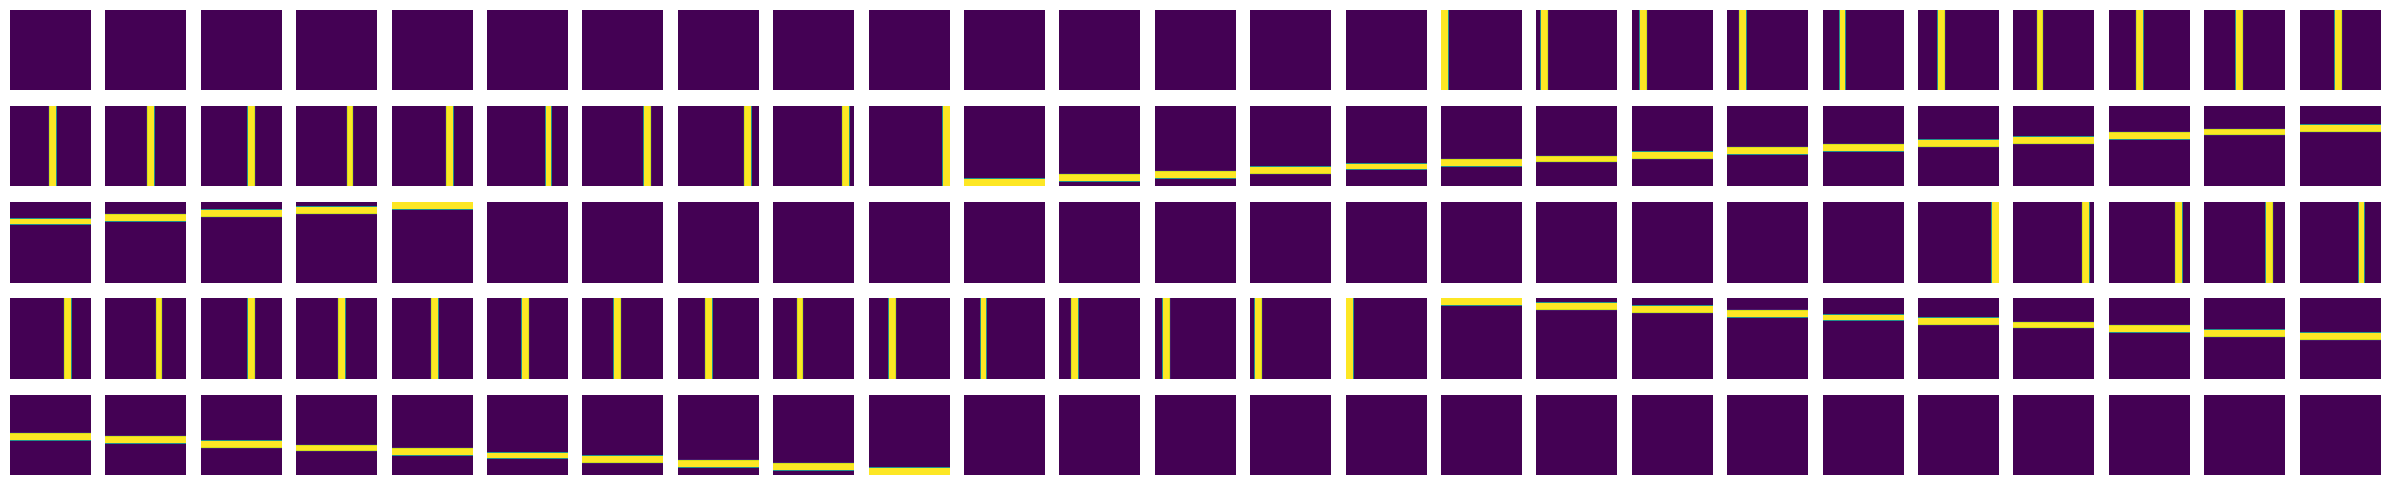

In [7]:
%matplotlib inline
dm_file = opj(os.path.dirname(bold_file), "design_task-2R.mat")
dm = prf.read_par_file(dm_file)
print(dm.shape)

prf.plot_stims(dm, n_cols=25)


In [8]:
# from scipy import io
# io.savemat(opj(os.path.dirname(bold_file), "design_task-2R.mat"), {"stim": dm})

In [9]:
loader = prf.pRFmodelFitting(
    bold,
    transpose=True,
    design_matrix=dm,
    TR=1.6,
    verbose=True,
    model="norm",
    fix_bold_baseline=True
)

pkl = opj(
    os.path.dirname(bold_file),
    f"sub-{sub_ve}_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"
)
loader.load_params(pkl, model="norm")

# plot parameters on surface
prf_obj = optimal.pRFCalc(pkl)

Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'



---------------------------------------------------------------------------------------------------
Check these important settings!
 Screen distance: 196cm
 Screen size: 39.3cm
 TR: 1.6s
---------------------------------------------------------------------------------------------------

Fixing baseline at [0, 0]
Instantiate HRF with: [1, 4.6, 0] (fit=True)
Using constraint(s): ['tc', 'tc']
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/sub-012/ses-1/sub-012_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl' (safest option; overwrites other settings)

---------------------------------------------------------------------------------------------------
Check these important updated settings!
 Screen distance: 196cm
 Screen size: 39.3cm
 TR: 1.6s
---------------------------------------------------------------------------------------------------

Inserting parameters from <class 'str'> as 'norm_iter' in <linescanning.prf.pRFmodelFitting object 

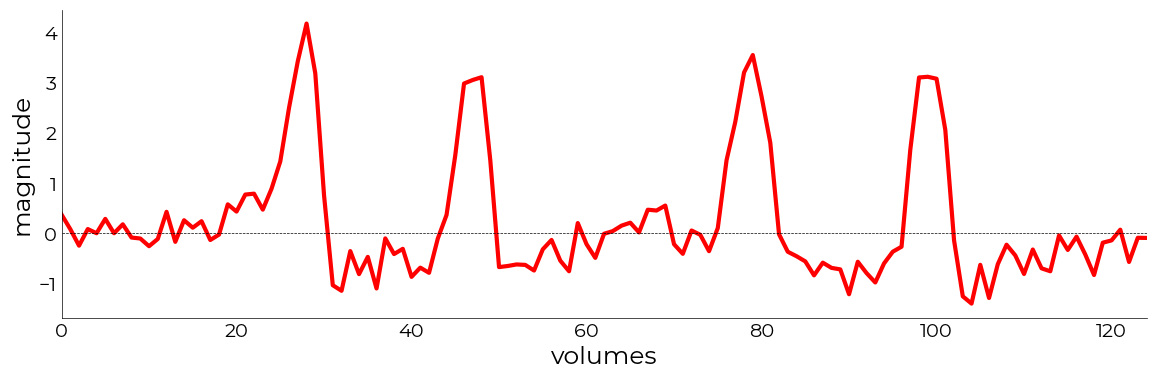

In [10]:
%matplotlib inline
plot_vert = 1000
tc = bold[:,plot_vert]
plotting.LazyPlot(
    tc,
    line_width=3,
    color="r",
    x_label="volumes",
    y_label="magnitude",
    add_hline=0
)

In [13]:
# plot parameters on surface    
prf_obj = optimal.pRFCalc(pkl)

b'created by heij on Fri Jan 19 14:07:27 2024\n'
b'created by heij on Fri Jan 19 14:30:44 2024\n'
b'created by heij on Fri Jan 19 14:07:27 2024\n'
b'created by heij on Fri Jan 19 14:35:53 2024\n'
b'created by heij on Fri Jan 19 14:07:27 2024\n'
b'created by heij on Fri Jan 19 14:07:27 2024\n'
b'created by heij on Fri Jan 19 14:30:44 2024\n'
b'created by heij on Fri Jan 19 14:35:53 2024\n'
b'created by heij on Fri Jan 19 14:07:46 2024\n'
b'created by heij on Fri Jan 19 14:07:46 2024\n'


Started server on port 17080


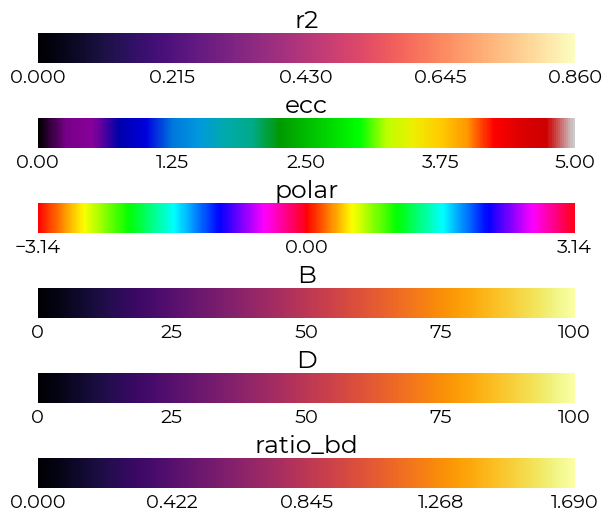

Stopping server


In [15]:
prf_obj.open_pycortex()

---
# size response functions

In [11]:
%matplotlib inline
# read the coordinate file
info_file = opj(
    ve_proj,
    "derivatives",
    "pycortex",
    f"sub-{sub_ve}",
    f"ses-{ls_ses}",
    f"sub-{sub_ve}_ses-{ls_ses}_desc-coords.csv"
)

if not os.path.exists(info_file):
    raise FileNotFoundError(f"Could not find file '{info_file}'. Please run: 'master -m 18 -s {sub_ve} -l {ses_ve} --norm --no_srf --manual --skip_prf_info'")

targ_info = utils.VertexInfo(info_file)

# load model file
model_file = opj(
    ve_proj,
    "derivatives",
    "pycortex",
    f"sub-{sub_ve}",
    f"ses-{ls_ses}",
    f"sub-{sub_ve}_ses-{ls_ses}_model-norm_desc-best_vertices.csv"
)

df = pd.read_csv(model_file)
df

,x,y,prf_size,prf_ampl,bold_bsl,surr_ampl,surr_size,neur_bsl,surr_bsl,A,...,size ratio,suppression index,ecc,polar,hrf_deriv,hrf_dsip,index,position,normal,hemi
0,2.331652,-0.325612,1.792858,5.747597,0.0,1.437115,6.037546,0.439520,12.473806,5.747597,...,3.367553,2.835530,2.354278,-0.138751,10.0,0.0,159911,[-19.842297 -77.58298 -25.682144],[0.48570088 0.85651291 0.17458607],L
1,-2.174398,-0.953263,1.598705,3.680931,0.0,0.007348,18.014138,600.092935,100.026953,3.680931,...,11.267956,0.253453,2.374177,-2.728425,10.0,0.0,167485,[ 6.7554812 -80.241936 -12.185423 ],[ 0.35633106 -0.6918961 0.62793945],R


Hemisphere: L
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'

---------------------------------------------------------------------------------------------------
Check these important settings!
 Screen distance: 196cm
 Screen size: 39.3cm
 TR: 1.6s
---------------------------------------------------------------------------------------------------

Fixing baseline at [0, 0]
Instantiate HRF with: [1, 4.6, 0] (fit=True)
Using constraint(s): ['tc', 'tc']
Starting gauss gridfit (1, 125) at 2024/02/08 14:23:44
Each batch contains approx. 1 voxels.
Completed Gaussian gridfit at 2024/02/08 14:23:45. Voxels/vertices above 0.1: 1/1
Gridfit took 0:00:01.195400 | Mean rsq>0.1: 0.41
Starting gauss iterfit (1, 125) at 2024/02/08 14:23:45


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Completed Gaussian iterfit at 2024/02/08 14:23:50. Mean rsq>0.1: 0.65
Iterfit took 0:00:04.850001
Reading manually specified settings

---------------------------------------------------------------------------------------------------
Check these important settings!
 Screen distance: 196cm
 Screen size: 39.3cm
 TR: 1.6s
---------------------------------------------------------------------------------------------------

Starting norm gridfit (1, 125) at 2024/02/08 14:23:50
Each batch contains approx. 1 voxels.
Completed norm gridfit at 2024/02/08 14:23:50. Mean rsq>0.1: 0.44
Gridfit took 0:00:00.119090
Starting norm iterfit (1, 125)  at 2024/02/08 14:23:50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Completed norm iterfit at 2024/02/08 14:24:21. Mean rsq>0.1: 0.67
Iterfit took 0:00:30.277210
 Max stimulation @19.89dva | ampl = 2.0
 Min stimulation @20.02dva | ampl = 0.0


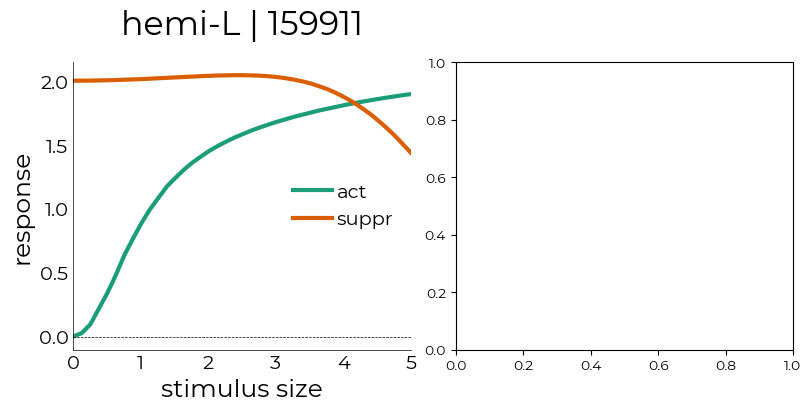

In [13]:
sizes = []
betas = []

fig,axs = plt.subplots(ncols=2, figsize=(8,4), constrained_layout=True)
for ix,hemi in enumerate(["L"]):

    print(f"Hemisphere: {hemi}")
    targ_vert = targ_info.get("index", hemi=hemi)
    n_verts = utils.get_vertex_nr(f"sub-{sub_ve}", fs_dir=opj(ve_proj, "derivatives", "freesurfer"), as_list=True)
    if hemi == "R":
        targ_vert += n_verts[0]

    # fetch timecourse
    _,_,tc_targ,_ = loader.plot_vox(vox_nr=targ_vert, make_figure=False, model="norm")

    # refit with trust-constr
    obj = prf.pRFmodelFitting(
        tc_targ,
        design_matrix=dm,
        TR=1.6,
        verbose=True,
        model="norm",
        fix_bold_baseline=True
    )

    obj.fit()

    # get new parameters
    start_pars,_,_,_ = obj.plot_vox(make_figure=False, model="norm")
    
    # calculate sizeresponse
    SR_ = prf.SizeResponse(params=start_pars, model="norm")
    fill_cent, fill_cent_sizes = SR_.make_stimuli(
        factor=1,
        dt="fill"
    )

    sr_cent_act = SR_.batch_sr_function(
        SR_.params_df,
        center_prf=True,
        stims=fill_cent,
        sizes=fill_cent_sizes
    )

    # hole-response
    hole_cent, hole_cent_sizes = SR_.make_stimuli(
        factor=1,
        dt="hole"
    )

    sr_cent_norm = SR_.batch_sr_function(
        SR_.params_df,
        center_prf=True,
        stims=hole_cent,
        sizes=hole_cent_sizes
    )

    %matplotlib inline
    ## PLOT
    plotting.LazyPlot(
        [df.iloc[:,0].values for df in [sr_cent_act,sr_cent_norm]],
        xx=fill_cent_sizes,
        color=["#1B9E77","#D95F02"],
        line_width=3,
        axs=axs[ix],
        x_label="stimulus size",
        y_label="response",
        labels=["act","suppr"],
        add_hline=0,
        title=f"hemi-{hemi} | {targ_vert}",
        x_lim=[0,5]
    )

    max_dva, max_val = SR_.find_stim_sizes(
        sr_cent_act[0].values,
        t="max",
        dt="fill",
        sizes=fill_cent_sizes,
        return_ampl=True
    )
    print(f" Max stimulation @{round(max_dva,2)}dva | ampl = {round(max_val,2)}")

    min_dva, min_val = SR_.find_stim_sizes(
        sr_cent_norm[0].values,
        t="min",
        dt="fill",
        sizes=fill_cent_sizes,
        return_ampl=True
    )
    print(f" Min stimulation @{round(min_dva,2)}dva | ampl = {round(min_val,2)}")

    sizes.append(np.array([max_dva,min_dva]))
    betas.append(np.array([max_val,min_val]))

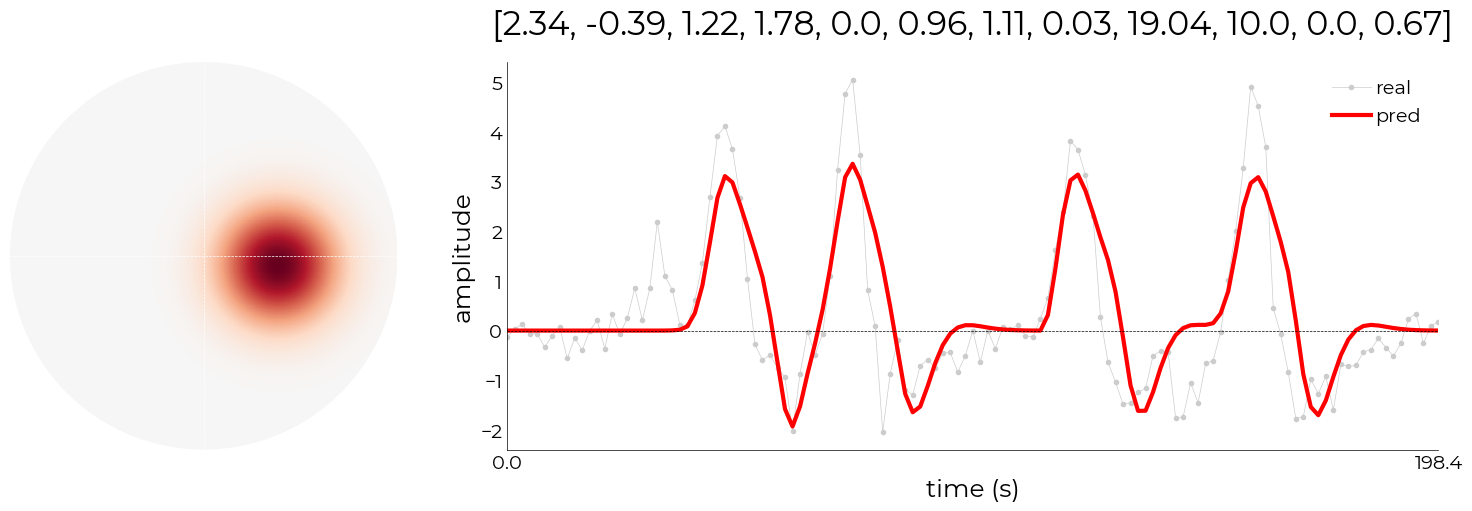

In [15]:
_ = obj.plot_vox(model="norm", title="pars")

In [ ]:
# insert relevant parameters
df["stim_sizes"] = sizes
df["stim_betas"] = betas
df

In [ ]:
# save into file the experiment understands
df.to_csv(model_file, index=False)

---
# Compare bgfs and trust-constr

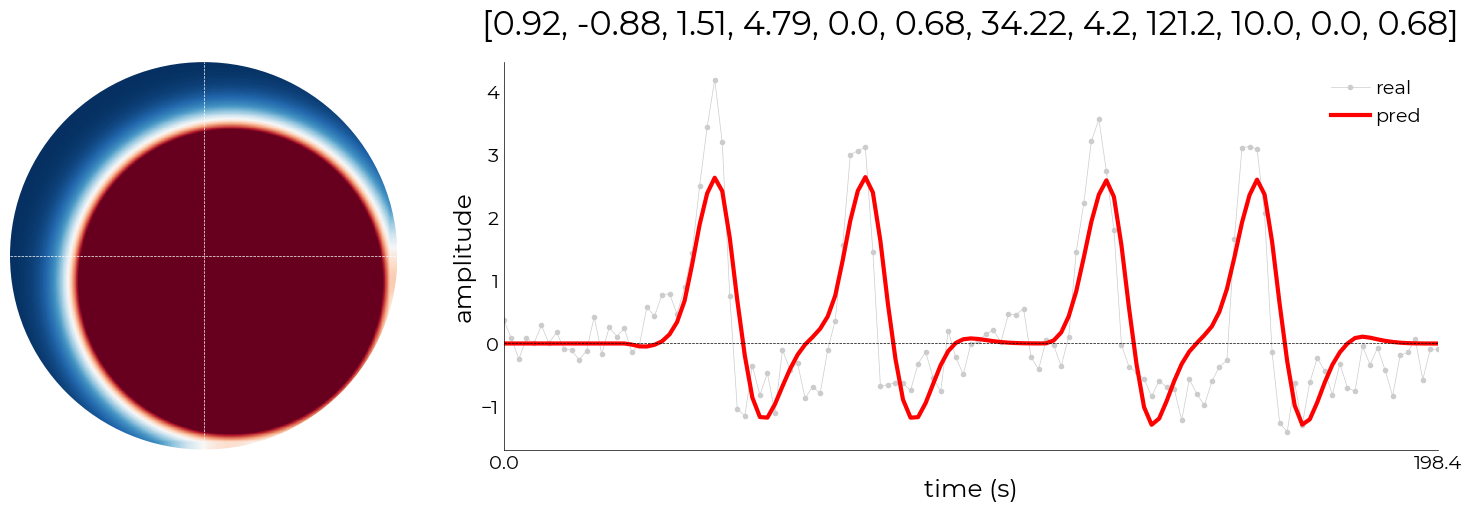

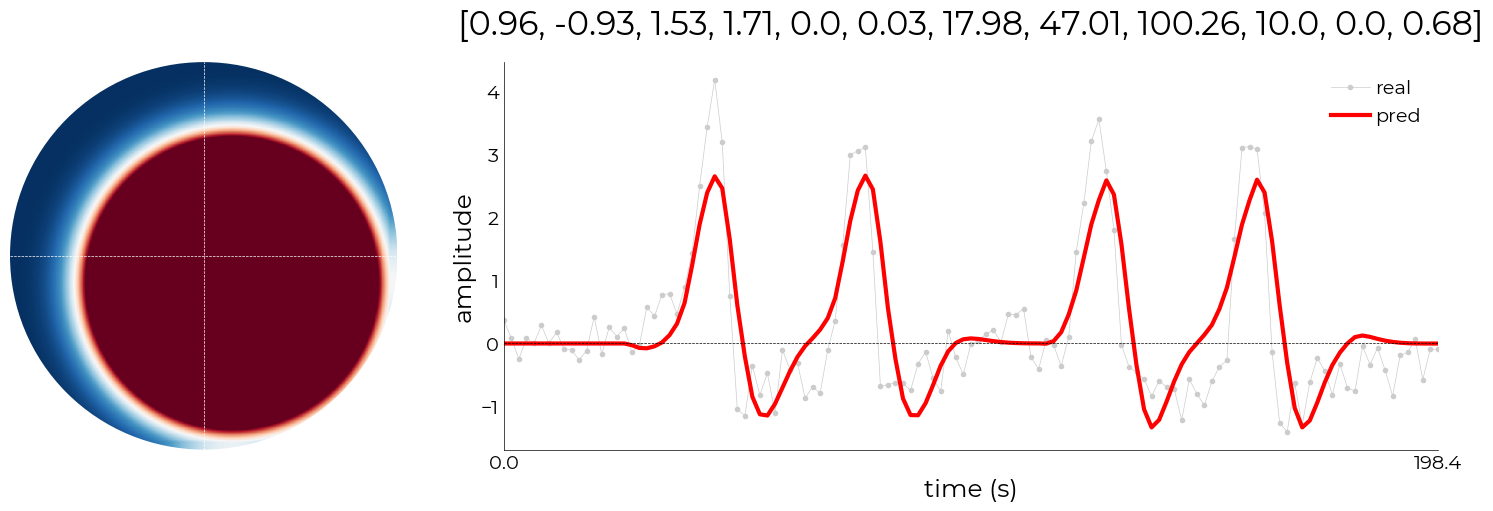

In [30]:
tc_pars,_,_,_ = obj.plot_vox(model="norm", title="pars")
bgfs_pars,_,_,_ = loader.plot_vox(vox_nr=plot_vert, model="norm", title="pars")

In [26]:
# calculate sizeresponse
SR_tc = prf.SizeResponse(params=tc_pars, model="norm")
SR_bgfs = prf.SizeResponse(params=bgfs_pars, model="norm")

## CENTERED PRF

# size response
fill_tc, fill_tc_sizes = SR_tc.make_stimuli(
    factor=1,
    dt="fill"
)

sr_tc_act = SR_tc.batch_sr_function(
    SR_tc.params_df,
    center_prf=True,
    stims=fill_tc,
    sizes=fill_tc_sizes
)

# hole-response
bgfs_cent, bgfs_cent_sizes = SR_bgfs.make_stimuli(
    factor=1,
    dt="fill"
)

sr_bgfs_act = SR_bgfs.batch_sr_function(
    SR_bgfs.params_df,
    center_prf=True,
    stims=bgfs_cent,
    sizes=bgfs_cent_sizes
)

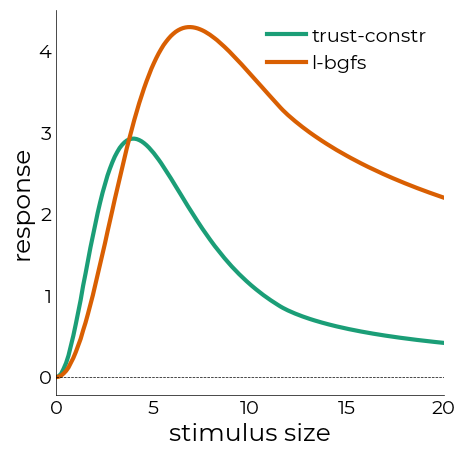

In [31]:
%matplotlib inline
## PLOT
plotting.LazyPlot(
    [df.iloc[:,0].values for df in [sr_tc_act,sr_bgfs_act]],
    xx=fill_tc_sizes,
    color=["#1B9E77","#D95F02"],
    line_width=3,
    figsize=(5,5),
    x_label="stimulus size",
    y_label="response",
    labels=["trust-constr","l-bgfs"],
    add_hline=0
)

In [ ]:
%matplotlib inline
# read the coordinate file
info_file = opj(
    ve_proj,
    "derivatives",
    "pycortex",
    f"sub-{sub_ve}",
    f"ses-{ses_ve}",
    f"sub-{sub_ve}_ses-{ses_ve}_desc-coords.csv"
)

if not os.path.exists(info_file):
    raise FileNotFoundError(f"Could not find file '{info_file}'. Please run: 'master -m 18 -s {sub_ve} -l {ses_ve} --norm --no_srf --manual --skip_prf_info'")

targ_info = utils.VertexInfo(info_file)